In [124]:
# Load libraries and data
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
%config Completer.use_jedi = False
player_DF = pd.read_pickle('data_all_TSE')
player_info = pd.read_pickle('info_all_TSE') 
survey = pd.read_pickle('quest_ansers_wra')

# Add dummy in player_DF if answering form
player_DF['form_answer'] = player_DF.globalid.apply(lambda x: 1 if x in survey['globalid'] else 0)

In [7]:
# checks whether a strategy is pure or not
def pure_data_player(player_DF):
    p_d = player_DF['strats'].apply(lambda x: 1 if np.array(x).max()==1 else 0)
    player_DF['pure_played'] = p_d
    return player_DF

# Returns share of players playing a pure strategy
def share_played_pure(player_DF):
    return pure_data_player(player_DF)['pure_played'].sum()/len(player_DF)

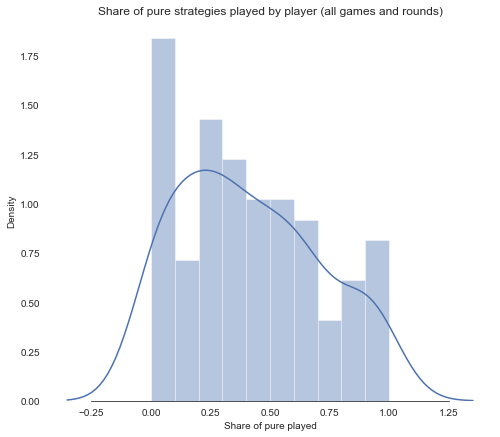

0.4140149908075237


globalid
0      0.566667
2      0.166667
3      0.166667
4      0.043210
8      0.583333
         ...   
138    0.625000
139    0.923077
141    0.224359
142    0.626437
143    0.240741
Name: pure_played, Length: 98, dtype: float64

In [68]:
# How often do people play pure strategies?
mean_share_pure = pure_data_player(player_DF)['pure_played'].groupby(player_DF['globalid']).agg('mean')
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(mean_share_pure, color="b",hist=1,bins=10);
ax.xaxis.grid(False)
ax.set(ylabel="Density")
ax.set(xlabel="Share of pure played")
ax.set(title="Share of pure strategies played by player (all games and rounds)")
sns.despine(trim=True, left=True)
plt.show()
print(share_played_pure(player_DF))
mean_share_pure

Text(0.5, 1.0, 'Share of pure strategies by round (all games)')

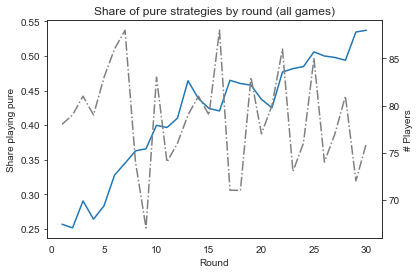

In [98]:
# See how the share of players playing pure strategies evolve over time
pure_share = player_DF.groupby('round').apply(share_played_pure)
nr_play = player_DF.groupby('round').globalid.count()/6
fig, ax1 = plt.subplots()
ax1.plot(pure_share)
ax1.set_ylabel('Share playing pure')
ax1.set_xlabel('Round')
ax2 = ax1.twinx()
ax2.plot(nr_play,linestyle='-.', color='gray')
ax2.set_ylabel('# Players')
ax1.set_title("Share of pure strategies by round (all games)")

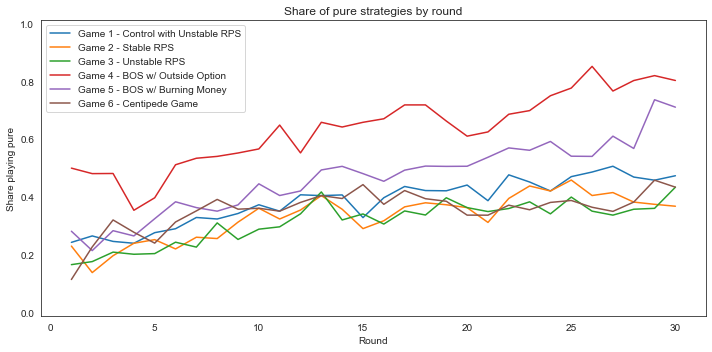

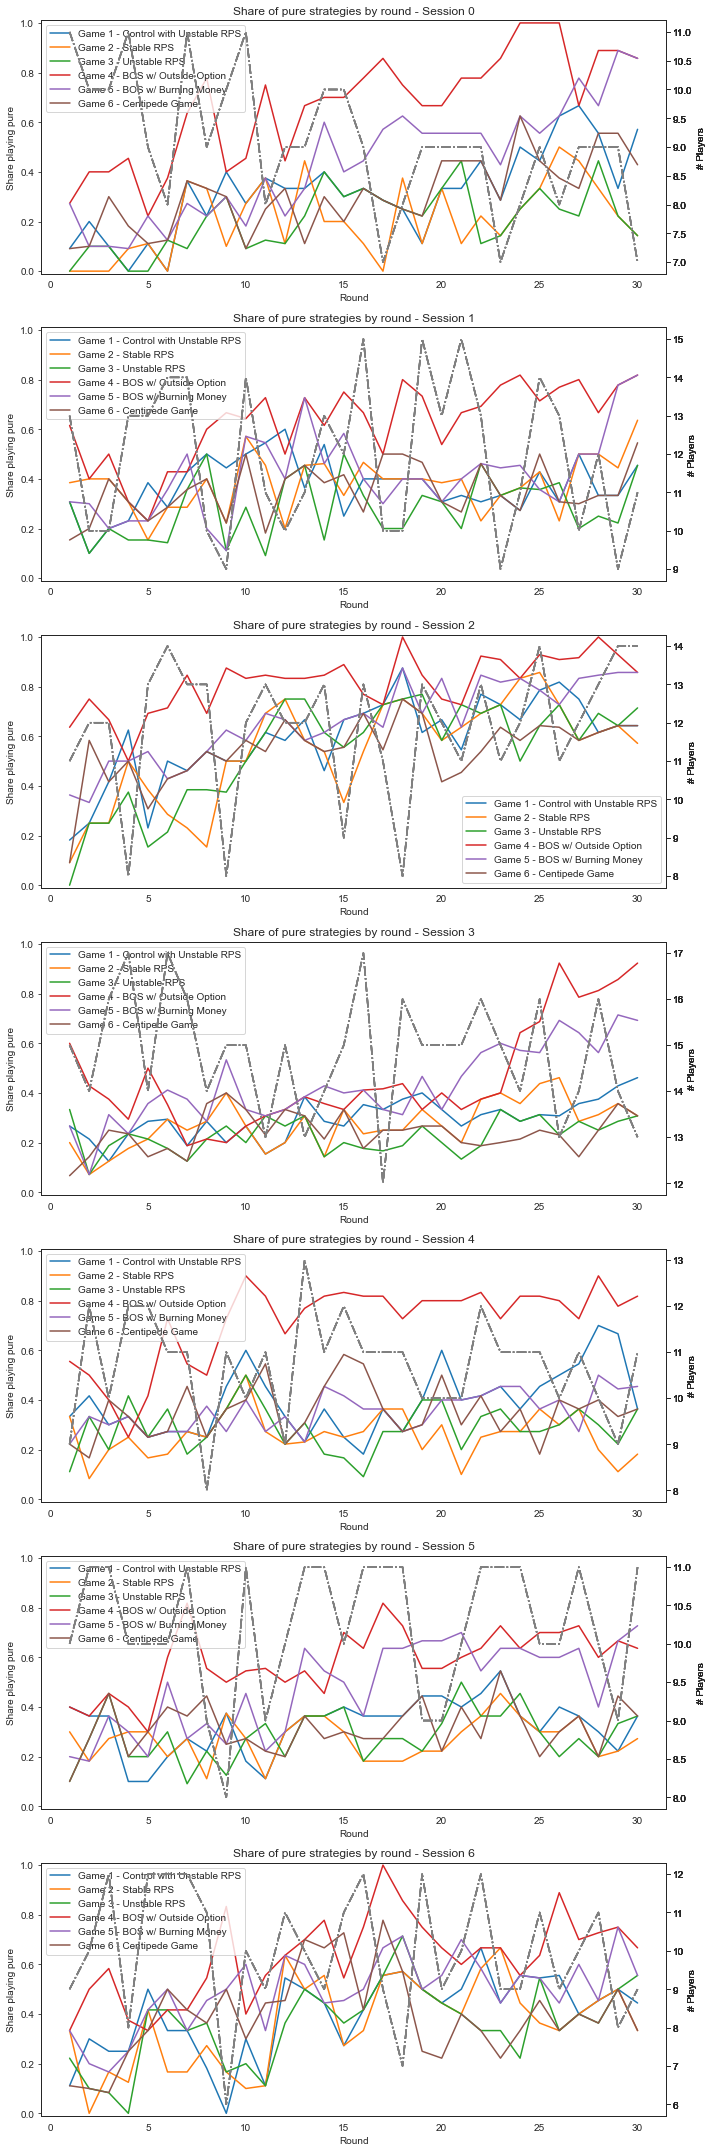

In [97]:
# Doing the same thing but per game and game & session
game_names = ['Control with Unstable RPS', 'Stable RPS', 'Unstable RPS', 'BOS w/ Outside Option', 'BOS w/ Burning Money','Centipede Game']
fig, axs = plt.subplots(1, 1)    
fig.set_size_inches(10, 5)

for gid in player_DF.gameid.unique():
    pure_share = player_DF[player_DF['gameid']==gid].groupby('round').apply(share_played_pure)
    axs.plot(pure_share, label=f"Game {gid} - {game_names[gid-1]}")
axs.legend()
axs.set_title("Share of pure strategies by round")
axs.set_xlabel('Round')
axs.set_ylabel('Share playing pure')
axs.set_ylim([-0.01, 1.01])
fig.tight_layout()

fig, axs = plt.subplots(len(player_DF.session.unique()), 1)    
fig.set_size_inches(10, 30)

for gid in player_DF.gameid.unique():
    for ses in player_DF.session.unique():
        pure_share = player_DF[(player_DF['gameid']==gid) & (player_DF['session']==ses)].groupby('round').apply(share_played_pure)
        nr_play = player_DF[(player_DF['gameid']==gid) & (player_DF['session']==ses)].groupby('round').playerid.count()
        axs[int(ses)].plot(pure_share, label=f"Game {gid} - {game_names[gid-1]}")
        axs[int(ses)].legend()
        axs[int(ses)].set_title(f"Share of pure strategies by round - Session {int(ses)}")
        axs[int(ses)].set_xlabel('Round')
        axs[int(ses)].set_ylabel('Share playing pure')
        axs[int(ses)].set_ylim([-0.01, 1.01])
        axst = axs[int(ses)].twinx()
        axst.plot(nr_play,linestyle='-.', color='gray')
        axst.set_ylabel('# Players')
fig.tight_layout()    

In [ ]:
# visualising some more outliers in the data values
fig, axs = plt.subplots(int(1+(len(numeric)-(len(numeric)%3))/3)-1, 3, figsize=(12, 40))
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)

for i, feature in enumerate(list(data_train[numeric]), 1):
    
    #plt.subplot(len(list(numeric)), 3, i)
    sns.scatterplot(x=feature, y='SalePrice', palette='Blues', data=data_train, ax=axs[int((i-1)/3), (i-1) % 3])
        
    plt.xlabel('{}'.format(feature), size=15,labelpad=12.5)
    plt.ylabel('SalePrice', size=15, labelpad=12.5)
    
    for j in range(2):
        plt.tick_params(axis='x', labelsize=12)
        plt.tick_params(axis='y', labelsize=12)

plt.show()

In [4]:
# Just a simple logistic regression to check stuff...
gid = 6
sid =2
X = player_DF[['cum_pure_played']][(player_DF.gameid==gid) & (player_DF.session==sid)][1:]
X = pd.concat([X.reset_index(drop=True),player_DF['round'][(player_DF.gameid==gid) & (player_DF.session==sid)][:-1].reset_index(drop=True)], axis=1)
y = player_DF['pure_played'][(player_DF.gameid==gid) & (player_DF.session==sid)][1:].reset_index(drop=True)
clf = LogisticRegression(random_state=0).fit(X, y)
clf.coef_
np.exp(clf.coef_[0])

array([1.0359689 , 1.01872624])

In [140]:
a, *b, c = 'spam'
a=50
_

50